In [1]:
import pandas as pd
import numpy as np

# Screening of DELs, DEMis and DEMs in patients with HF
We take 3 gene expression profiles ((GSE77399, GSE104150 and GSE84796)) from GEO and uploaded to GEO2R to screen for the DELs, DEMis and DEMs between HF patients and healthy controls.

The screening threshold for DE genes is as follow
$P-value < 0.05$ and $|log2FC|>=1$. 

Then upregulated means $log2FC>=1$ and $log2FC<=-1$. 

# DE LncRNAs

In [ ]:
#DEL =['EGOT','GAS5','HOTAIR','LINKROR','PCAT1','VLDLR‐AS1','H19','HOXA11‐AS','SOX2‐OT','BACE1‐AS','TUG1','BCYRN1']

# DE miRNAs

In [ ]:
#All miRNAs


# DE mRNAs

In [2]:
#All mRNAs
geo_mrna_df = pd.read_csv('mRNA.cgi',sep="\t")
geo_mrna_df.shape

(42543, 9)

In [3]:
#Extracting DEMs
de_mrna_df= geo_mrna_df[(geo_mrna_df['P.Value']<=0.05) & (abs(geo_mrna_df['logFC'])>=1)]

In [4]:
#Remove entries with NaN values
de_mrna_df=de_mrna_df.dropna()
de_mrna_df.shape

(2911, 9)

In [5]:
#Create a list GB Accession number of DEMs and write to a file for next step
dems_gb_acc = list(set(de_mrna_df['GB_ACC']))
open('GB_acc_list.txt','w').write('\n'.join(dems_gb_acc))

27522

To convert GB accession numbers to gene symbol, we use the online ID conversion tool of (DAVID)[https://david.ncifcrf.gov/list.jsp] and result downloaded as *mrna_names.txt* . Following code will extract GENE SYMBOLS from this file

In [6]:
mrna_names =open('mrna_names.txt').read().split('\n')
mrna_names=mrna_names[:-1]
import re
i =0
de_mrnas_symbols =[]
for entries in mrna_names[1:]:
    name=entries.split('\t')[1]
    name=re.findall(r'\([A-Z0-9]*\)',name)
    if len(name)>0:
        name=name[0].replace('(','')
        name=name.replace(')','')
        de_mrnas_symbols.append(name)

In [7]:
dems = de_mrnas_symbols[:]
print("Number of DE mRNAs:%d" %len(dems))

Number of DE mRNAs:2318


# DELs and DEMi interactions
Next step is to prepare the lncRNA - miRNA interaction pairs from list of DE (lnc/mi)RNAs. lncRNA-miRNA interactions are downloaded from (miRNET)[https://www.mirnet.ca/miRNet/home.xhtml]

In [8]:
coexp_del =['EGOT','GAS5','HOTAIR','LINKROR','PCAT1','VLDLR‐AS1','H19','HOXA11‐AS','SOX2‐OT','BACE1‐AS','TUG1','BCYRN1']
temp =[['hsa-miR-183-5p', 'hsa-miR-491-3p', 'hsa-miR-586'],['hsa-let-7a-5p', 'hsa-let-7g-5p', 'hsa-let-7i-5p', 'hsa-miR-101-3p', 'hsa-miR-15a-3p', 'hsa-miR-23a-3p','hsa-miR-26b-5p', 'hsa-miR-382-3p', 'hsa-miR-382-3p', 'hsa-miR-542-3p', 'hsa-miR-576-5p','hsa-miR-590-3p', 'hsa-miR-7f-5p', 'hsa-miR-876-3p'],['hsa-miR-491-3p', 'hsa-miR-548ap-3p', 'hsa-miR-548c-3p', 'hsa-miR-548f-3p', 'hsa-miR-548f-3p','hsa-miR-586', 'hsa-miR-597-5p', 'hsa-miR-8485'],['hsa-miR-1238-3p', 'hsa-miR-26b-5p', 'hsa-miR-302d-5p', 'hsa-miR-580-3p', 'hsa-miR-616-3p', 'hsa-miR-6883-3p', 'hsa-miR-8485'],['hsa-miR-548c-3p'],['hsa-miR-542-3p', 'hsa-miR-548f-3p'],['hsa-miR-483-3p', 'hsa-miR-423-5p', 'hsa-miR-30d-5p', 'hsa-miR-940', 'hsa-miR-324-3p', 'hsa-miR-1825','hsa-miR-486-5p'],['hsa-miR-940'],['hsa-miR-574-5p', 'hsa-miR-320a', 'hsa-miR-22-3p'],['hsa-miR-181a-5p'],['hsa-miR-320c', 'hsa-miR-320a', 'hsa-miR-486-5p', 'hsa-miR-181a-5p', 'hsa-miR-320b', 'hsa-miR-1825','hsa-miR-1202', 'hsa-miR-30d-5p', 'hsa-miR-197-3p', 'hsa-miR-483-3p', 'hsa-miR-320d', 'hsa-miR-574-5p'],['hsa-miR-22-3p', 'hsa-miR-320e']]
temp2 = []
for i in range(len(temp)):
    temp2 = temp2 + temp[i]
coexp_demi = set(temp2)

del_dem_pairs =[]
for i in range(len(coexp_del)):
    for mir in temp[i]:
        del_dem_pairs.append((coexp_del[i],mir))
        
print (len(coexp_del),len(coexp_demi),len(del_dem_pairs))
    

12 43 61


# DEMi and DEM interactions
The mRNA-miRNA interactions are selected by searching all human gene-miRNA interactions from mirTarBase database.

In [9]:
mir_mr_df = pd.read_excel('hsa_MTI.xlsx')

In [10]:
mir_mr_df.shape

(502652, 9)

In [11]:
#Drop duplicate interactions
mir_mr_df.drop_duplicates(inplace=True,subset=['miRNA','Target Gene'])
mir_mr_df.shape

(380639, 9)

In [ ]:
#mir_mr_df['miRNA'] = mir_mr_df['miRNA'].str.lower()

In [ ]:
#len(demis_int)

In [12]:
#Interactions of DEMis having interaction with DEL
mir_mr_df=mir_mr_df[mir_mr_df['miRNA'].isin(coexp_demi)]
mir_mr_df.shape

(12196, 9)

In [13]:
#Interactions havig DEMs
mir_mr_df=mir_mr_df[mir_mr_df['Target Gene'].isin(dems)]
mir_mr_df.shape

(1044, 9)

In [14]:
coexp_dem = list(set(mir_mr_df['Target Gene']))
len(coexp_dem)

637

In [15]:
demi_dem_pairs=[]
for mir,mrn in zip(list(mir_mr_df['miRNA']),list(mir_mr_df['Target Gene'])):
    demi_dem_pairs.append((mir,mrn))
len(demi_dem_pairs)

1044

In [16]:
print ("Between %d DE miRNAs and %d mRNAs, total %d interactions"%(len(set(mir_mr_df['miRNA'])), len(set(mir_mr_df['Target Gene'])), mir_mr_df.shape[0]))

Between 42 DE miRNAs and 637 mRNAs, total 1044 interactions


## Pathways

In [17]:
pathways = open('c2.cp.kegg.v7.1.symbols.gmt').read().split('\n')
len(pathways)

187

In [19]:
pathway_genes_dict = {pathway.split('\t')[0]: pathway.split('\t')[2:] for pathway in pathways}
#pathway_genes_dict

In [20]:
#Remove pathways with length <10
count=0
keys= list(pathway_genes_dict.keys())
for key in keys:
    if len(pathway_genes_dict[key])<10:
        count+=1
        pathway_genes_dict.pop(key,None)

len(pathway_genes_dict),count


(186, 1)

In [21]:
k=1
rel_pathways =[]
for key in pathway_genes_dict:
    genes = pathway_genes_dict[key]
    include = False
    for gene in genes:
        if gene in coexp_dem:
            #print(k,key,gene)
            k+=1
            include=True
    if include:
        rel_pathways.append(key)
            
print (k,len(rel_pathways))

649 132


In [22]:
#mRNA-pathway edges
dem_path_pairs=[]
for key in rel_pathways:
    for gene in coexp_dem:
        if gene in pathway_genes_dict[key]:
            dem_path_pairs.append((gene,key))
print(len(dem_path_pairs))

648


# Create ceRNA network based on co-expression

In [23]:
edges = del_dem_pairs[:]
edges +=demi_dem_pairs
edges += dem_path_pairs
len(edges)

1753

In [24]:
fp=open('ceRNA_edges.edgelist','w')
for edge in edges:
    fp.write(edge[0]+'\t'+edge[1]+'\n')
fp.close()

## Use networkx to create graph

In [25]:
import networkx as nx

In [26]:
graph = nx.read_edgelist('ceRNA_edges.edgelist')

In [27]:
print("ceRNA network with %d nodes and %d edges created" %(graph.number_of_nodes(),graph.number_of_edges()))

ceRNA network with 824 nodes and 1751 edges created


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

#nx.draw(lda_graph,node_color=colors, cmap = plt.get_cmap('rainbow'), with_labels=True,pos=nx.spring_layout (lda_graph))

<bound method Graph.subgraph of <networkx.classes.graph.Graph object at 0x7f9922dbc780>>

In [ ]:
node_type ={'d':[],'o':[],'s':[]}
for node in graph.nodes:
    if node in demis:
        node_type['d'].append(node)
    elif node in dels:
        node_type['o'].append(node)
    else:
        node_type['s'].append(node)

node_type['d'] =list(set(node_type['d']))
node_type['o'] =list(set(node_type['o']))
node_type['s'] =list(set(node_type['s']))


In [ ]:
for aShape in node_type:
    nx.draw_networkx_nodes(graph,nodePos,node_shape = aShape, nodelist = node_type[aShape])
nx.draw_networkx_edges(graph,nodePos)

# Graph embedding using node2Vec

In [29]:
from node2vec import Node2Vec

unable to import 'smart_open.gcs', disabling that module


In [30]:
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=100, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities: 100%|██████████| 824/824 [00:00<00:00, 1183.18it/s]


In [31]:
node_vec ={}
for mir in coexp_demi:
    node_vec[mir] = model.wv.get_vector(mir)
    
for lnc in coexp_del:
    node_vec[lnc] = model.wv.get_vector(lnc)
    
for mr in coexp_dem:
    node_vec[mr] = model.wv.get_vector(mr)
    
for pw in rel_pathways:
    node_vec[pw]=model.wv.get_vector(pw)

len(node_vec)

824

In [32]:
import random
keys = list(node_vec.keys())
random.shuffle(keys)
vector =[]
for key in keys:
    vector.append(node_vec[key])
vector =np.array(vector)
vector.shape

(824, 64)

# Generate deep representation using DBN

In [33]:
import warnings  
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import numpy as np
    import random
    from dbn_tf import DBN
    from rbm_tf import BBRBM, GBRBM
    from util import normalization
    import time

In [34]:
dataset = normalization(vector)

/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/manu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [55]:
hidden =128
dbn = DBN(hidden_layers_structure=[hidden,hidden,hidden],weight_cost=0.001,batch_size=4,n_epoches=30, learning_rate_rbm=[0.0005,1e-2,1e-2],rbm_gauss_visible=True)


In [56]:
dbn.fit(dataset)

In [57]:
dataset = dbn.transform(dataset)

In [58]:
dataset.shape

(824, 64)

# Cluster Analysis



## Hierarchical clustering

In [68]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
#np.random.seed(4711)

In [ ]:
# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)


In [ ]:
# #model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# #model = model.fit(dataset)
# #nc=5

# model = AgglomerativeClustering(n_clusters=None,compute_full_tree=True,distance_threshold=0)
# model.fit(dataset)
# model.n_clusters_

# #kmeans = KMeans(n_clusters=nc, random_state=0).fit(dataset)



In [40]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

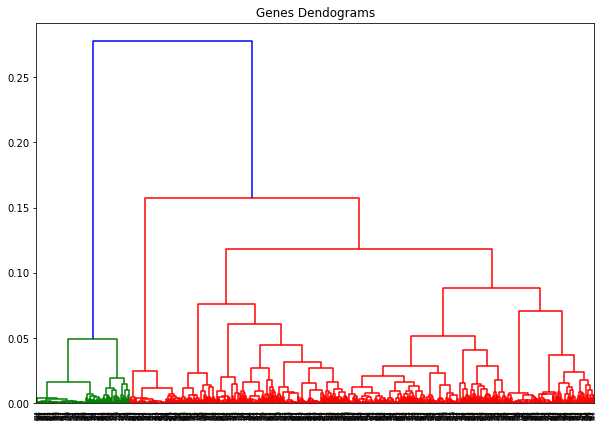

In [60]:

plt.figure(figsize=(10, 7))
plt.title("Genes Dendograms")
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))

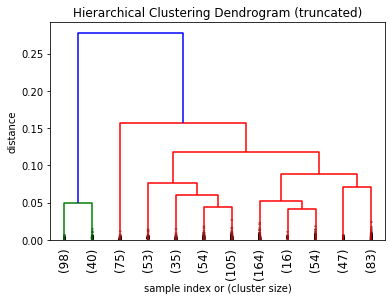

In [62]:
fancy_dendrogram(
    shc.linkage(dataset, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    #max_d= 55
)
plt.show()

In [43]:
#nc=5
from scipy.cluster.hierarchy import fcluster
#fcluster(Z,nc , criterion='maxclust')

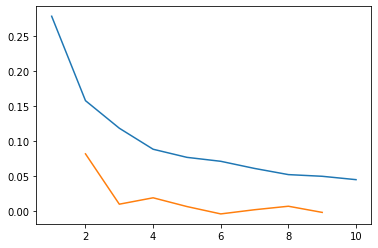

clusters: 2


In [63]:
Z = shc.linkage(dataset, method='ward') 
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [ ]:
# nc=k
# clusters ={i:{'DEL':[],'DEM':[],'DEMi':[]} for i in range(1,nc+1)}
# #labels = model.labels_.tolist()
# labels = list(fcluster(Z, nc, criterion='maxclust'))
# for i in range(len(labels)):
#     if keys[i] in coexp_del:
#         clusters[labels[i]]['DEL'].append(keys[i])
#     elif keys[i] in coexp_demi:
#         clusters[labels[i]]['DEMi'].append(keys[i])
#     else:
#         clusters[labels[i]]['DEM'].append(keys[i])
    
# for i in range(1,nc+1):
#     print(clusters[i])
#     print (len(clusters[i]['DEL'])+len(clusters[i]['DEM'])+len(clusters[i]['DEMi']))
#     print('\n')


In [47]:
#from sklearn.cluster import AgglomerativeClustering

In [64]:
nc = k
clusters ={i:{'DEL':[],'DEM':[],'DEMi':[],'Pathways':[]} for i in range(nc)}
clustering = AgglomerativeClustering(n_clusters=nc).fit(dataset)
labels = clustering.labels_.tolist()

for i in range(len(labels)):
    if keys[i] in coexp_del:
        clusters[labels[i]]['DEL'].append(keys[i])
    elif keys[i] in coexp_demi:
        clusters[labels[i]]['DEMi'].append(keys[i])
    elif keys[i] in coexp_dem:
        clusters[labels[i]]['DEM'].append(keys[i])
    else:
        clusters[labels[i]]['Pathways'].append(keys[i])
        
for i in range(nc):
    print(clusters[i])


{'DEL': ['HOXA11‐AS', 'BACE1‐AS', 'VLDLR‐AS1', 'SOX2‐OT', 'BCYRN1', 'EGOT', 'PCAT1', 'H19', 'LINKROR', 'HOTAIR', 'GAS5', 'TUG1'], 'DEM': ['NIPAL1', 'KLRD1', 'THEMIS2', 'VCAM1', 'NFIL3', 'CD3D', 'PLXNC1', 'ERN1', 'INO80D', 'MFSD4A', 'CD244', 'CDH7', 'EVI2A', 'RNF122', 'FKBP4', 'CDKN2A', 'IL10RA', 'CHAC1', 'TRAF5', 'KLLN', 'ZNF780A', 'CORO7', 'BCL2L11', 'ZNF846', 'NBPF10', 'PYGO1', 'TUSC1', 'SERPINA3', 'MPP2', 'ZNF157', 'RANBP6', 'SMTNL2', 'C1RL', 'COL16A1', 'DYRK3', 'CYBA', 'P3H2', 'NUP210', 'JAML', 'FAM81B', 'SEMA4B', 'NOTCH2NL', 'SLFN12L', 'ADAMTS4', 'TLR7', 'FERMT2', 'TRAF1', 'B4GALT6', 'FAM83F', 'PSD4', 'RHOH', 'SLC24A2', 'CNOT6L', 'BCAS4', 'PLEKHO1', 'SSC5D', 'MYO5A', 'RAPGEFL1', 'CSRNP3', 'ZNF226', 'ANKRD36', 'SLITRK4', 'TMEM79', 'COL1A1', 'SLC25A25', 'VAV2', 'MDK', 'PLEKHH2', 'IGFBP2', 'PTK2B', 'HES6', 'TNFSF14', 'SMCR8', 'TRABD2A', 'DCAF12L2', 'ITGB3', 'MORN4', 'IRS1', 'BCAR1', 'RNF125', 'HDAC9', 'STK4', 'OTUD7A', 'HAVCR2', 'GCSAM', 'FRMPD4', 'GLIS2', 'SIGLEC14', 'KCNIP2', 'KCNB

## K-Means

In [65]:
from sklearn.cluster import KMeans

In [66]:
nc=k
kmeans = KMeans(n_clusters=nc, random_state=0).fit(dataset)

clusters ={i:{'DEL':[],'DEM':[],'DEMi':[]} for i in range(nc)}
labels = kmeans.labels_.tolist()

for i in range(len(labels)):
    if keys[i] in coexp_del:
        clusters[labels[i]]['DEL'].append(keys[i])
    elif keys[i] in coexp_demi:
        clusters[labels[i]]['DEMi'].append(keys[i])
    else:
        clusters[labels[i]]['DEM'].append(keys[i])    
for i in range(nc):
    print(clusters[i])


{'DEL': ['HOXA11‐AS', 'BACE1‐AS', 'VLDLR‐AS1', 'SOX2‐OT', 'BCYRN1', 'EGOT', 'PCAT1', 'H19', 'LINKROR', 'HOTAIR', 'GAS5', 'TUG1'], 'DEM': ['NIPAL1', 'KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY', 'KLRD1', 'KEGG_PHENYLALANINE_METABOLISM', 'THEMIS2', 'VCAM1', 'NFIL3', 'KEGG_CITRATE_CYCLE_TCA_CYCLE', 'CD3D', 'PLXNC1', 'ERN1', 'KEGG_SMALL_CELL_LUNG_CANCER', 'KEGG_WNT_SIGNALING_PATHWAY', 'INO80D', 'MFSD4A', 'CD244', 'CDH7', 'KEGG_HUNTINGTONS_DISEASE', 'RNF122', 'KEGG_MELANOGENESIS', 'FKBP4', 'KEGG_LONG_TERM_POTENTIATION', 'CDKN2A', 'KEGG_TASTE_TRANSDUCTION', 'IL10RA', 'KEGG_MISMATCH_REPAIR', 'TRAF5', 'KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS', 'KLLN', 'ZNF780A', 'KEGG_OOCYTE_MEIOSIS', 'CORO7', 'BCL2L11', 'ZNF846', 'NBPF10', 'KEGG_GRAFT_VERSUS_HOST_DISEASE', 'KEGG_FOCAL_ADHESION', 'PYGO1', 'TUSC1', 'SERPINA3', 'MPP2', 'KEGG_VIBRIO_CHOLERAE_INFECTION', 'ZNF157', 'RANBP6', 'SMTNL2', 'C1RL', 'KEGG_REGULATION_OF_AUTOPHAGY', 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES', 'COL16A1', 'DYRK3

In [ ]:
# plot_dendrogram(model, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.savefig('Cluster_dendo.png')

In [ ]:
fp = open('genes_for_pathway.txt','w')
for gene in clusters[0]['DEM']:
    fp.write(gene+'\n')
fp.close()

In [71]:
nc = k
clusters ={i:{'DEL':[],'DEM':[],'DEMi':[],'Pathways':[]} for i in range(1,nc+1)}
#clustering = AgglomerativeClustering(n_clusters=nc).fit(dataset)
labels = fcluster(Z,nc , criterion='maxclust').tolist()

for i in range(len(labels)):
    if keys[i] in coexp_del:
        clusters[labels[i]]['DEL'].append(keys[i])
    elif keys[i] in coexp_demi:
        clusters[labels[i]]['DEMi'].append(keys[i])
    elif keys[i] in coexp_dem:
        clusters[labels[i]]['DEM'].append(keys[i])
    else:
        clusters[labels[i]]['Pathways'].append(keys[i])
        
for i in range(1,nc+1):
    print(clusters[i])


{'DEL': [], 'DEM': ['TMEM156', 'TRANK1', 'LILRA4', 'FOLR2', 'COX5A', 'ARL4A', 'RNASE6', 'RNASET2', 'CCL2', 'HOXC4', 'ZWINT', 'PLAC8', 'PARP4', 'PDE4A', 'PHLDA1', 'GPR183', 'KRT222', 'CXCL9', 'NT5DC2', 'CRTAM', 'GATA4', 'TNFAIP3', 'DOCK10', 'PSMB8', 'PDE4DIP', 'GRM8', 'TGM1', 'ERI2', 'RPGRIP1', 'RASGRP3', 'EIF1AY', 'CXCL13', 'ATXN2L', 'CCDC170', 'DMXL2', 'IRF4', 'FKTN', 'CISH', 'FMO3', 'RAB30', 'RIPK4', 'FOLH1', 'NR4A3', 'SFRP4', 'KLRC1', 'EDN2', 'S100A7A', 'CDH9', 'BATF', 'SOCS6', 'IGSF6', 'MARCH1', 'SMPD3', 'COL5A1', 'LAMP3', 'PCBP3', 'PHLDA2', 'TMEM154', 'BCL11B', 'ENDOG', 'UNC93B1', 'PNOC', 'CNTRL', 'IGFLR1', 'DDX60', 'DCHS2', 'CXCR6', 'ITGAX', 'NABP1', 'MYOG', 'BLNK', 'F3', 'GRIK2', 'CACNB4', 'NAMPT', 'IKZF1', 'SNRPC', 'REEP4', 'RNF6', 'KCNN2', 'ANKRD36B', 'TRIM22', 'VANGL2', 'MREG', 'IFIH1', 'MCTP2', 'LIG1', 'IDH2', 'ZFY', 'LSAMP', 'SLAMF1', 'ATF3', 'TMEM254', 'SLC6A9', 'TOX', 'RYR3', 'SIDT1', 'TRPC4', 'LIF', 'GDF10', 'PRSS16', 'MNDA', 'CYTIP', 'IFRD2', 'LRRC8E', 'KIF21B', 'KLRC4'

In [73]:
from networkx.algorithms import bipartite

In [86]:
bipartite.is_bipartite(graph)

True

In [87]:
bipartite.sets(graph)

({'ABCC3',
  'ABCC5',
  'ADAM28',
  'ADAMTS4',
  'ADAMTS9',
  'ADGRG6',
  'AFF1',
  'AHSA2',
  'AIDA',
  'ALOX5AP',
  'AMD1',
  'ANGPTL7',
  'ANKRD33B',
  'ANKRD36',
  'ANKRD36B',
  'ANKRD44',
  'AP1S3',
  'APOL6',
  'ARAP2',
  'ARHGAP15',
  'ARHGAP21',
  'ARL4A',
  'ARRDC3',
  'ART4',
  'ASCL2',
  'ASPN',
  'ATAD5',
  'ATF3',
  'ATP2A2',
  'ATP5G1',
  'ATXN2L',
  'ATXN7L1',
  'AURKA',
  'B4GALT6',
  'BACE1‐AS',
  'BACH2',
  'BANK1',
  'BATF',
  'BCAR1',
  'BCAS4',
  'BCL11B',
  'BCL2L11',
  'BCYRN1',
  'BEST3',
  'BGN',
  'BLNK',
  'BMF',
  'BMP4',
  'BMP6',
  'BMP7',
  'BTLA',
  'C1QB',
  'C1QTNF1',
  'C1RL',
  'CACNA1I',
  'CACNB4',
  'CAMK4',
  'CAPS',
  'CASP8',
  'CASS4',
  'CCDC170',
  'CCDC171',
  'CCDC33',
  'CCDC65',
  'CCDC80',
  'CCDC85C',
  'CCDC88C',
  'CCL2',
  'CCL5',
  'CCR7',
  'CCSAP',
  'CD19',
  'CD226',
  'CD244',
  'CD28',
  'CD3D',
  'CD40LG',
  'CD44',
  'CD59',
  'CDH7',
  'CDH9',
  'CDKN2A',
  'CENPM',
  'CENPN',
  'CEP128',
  'CEP85L',
  'CFAP77',
  'CFHR3',

In [78]:
c = bipartite.clustering(graph,mode='dot')

In [79]:
c['HOTAIR']

0.13349649552022533

In [81]:
closeness =bipartite.closeness_centrality(graph,graph.nodes)

In [85]:
closeness['HOTAIR']

0.5709330558446063

In [88]:
from networkx.algorithms import community

In [93]:
communities_generator = community.girvan_newman(graph)

In [94]:
top_level_communities = next(communities_generator)

In [95]:
next_level_communities = next(communities_generator)

In [96]:
sorted(map(sorted, next_level_communities))

[['ABCC3',
  'ABCC5',
  'ADAM28',
  'ADGRG6',
  'AHSA2',
  'AIDA',
  'AMD1',
  'ANGPTL7',
  'ANKRD33B',
  'ANKRD36',
  'ANKRD36B',
  'AP1S3',
  'APOL6',
  'ARAP2',
  'ARHGAP15',
  'ARHGAP21',
  'ARL4A',
  'ARRDC3',
  'ART4',
  'ASCL2',
  'ASPN',
  'ATAD5',
  'ATF3',
  'ATP2A2',
  'ATP5G1',
  'ATXN2L',
  'ATXN7L1',
  'AURKA',
  'BACE1‐AS',
  'BATF',
  'BCAR1',
  'BCAS4',
  'BCL11B',
  'BCL2L11',
  'BCYRN1',
  'BEST3',
  'BLNK',
  'BMF',
  'BMP4',
  'BMP6',
  'BMP7',
  'BTLA',
  'C1QB',
  'C1QTNF1',
  'C1RL',
  'CACNA1I',
  'CACNB4',
  'CAMK4',
  'CAPS',
  'CASP8',
  'CASS4',
  'CCDC170',
  'CCDC171',
  'CCDC33',
  'CCDC65',
  'CCDC80',
  'CCDC85C',
  'CCDC88C',
  'CCL2',
  'CCL5',
  'CCR7',
  'CCSAP',
  'CD19',
  'CD226',
  'CD244',
  'CD28',
  'CD3D',
  'CD40LG',
  'CD44',
  'CD59',
  'CDH9',
  'CDKN2A',
  'CENPM',
  'CENPN',
  'CEP128',
  'CEP85L',
  'CFAP77',
  'CFHR3',
  'CFTR',
  'CGNL1',
  'CHAC1',
  'CHEK2',
  'CISH',
  'CLIC6',
  'CNOT6L',
  'CNTRL',
  'COL14A1',
  'COL16A1',
  

In [98]:
type(next_level_communities)

tuple

In [100]:
print(next_level_communities[0])

{'UTP11', 'HSPA6', 'INO80D', 'KEGG_WNT_SIGNALING_PATHWAY', 'CCSAP', 'TGM1', 'PPIL1', 'KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS', 'hsa-miR-491-3p', 'MYO5A', 'PIK3R1', 'hsa-miR-26b-5p', 'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY', 'hsa-miR-574-5p', 'KEGG_LONG_TERM_DEPRESSION', 'CYCS', 'TLR5', 'HMGN2', 'NPY4R', 'hsa-miR-320d', 'BEST3', 'RPAIN', 'TACC1', 'SEPT1', 'FNDC9', 'ITGB2', 'IRF4', 'KEGG_CARDIAC_MUSCLE_CONTRACTION', 'MYO1F', 'CCDC170', 'RANBP6', 'DUSP2', 'GCSAM', 'LILRA4', 'S100A16', 'NOTCH2', 'CD244', 'FAM105A', 'GINS2', 'LILRA2', 'hsa-miR-197-3p', 'DCAF12L2', 'DYRK3', 'KEGG_GLUTATHIONE_METABOLISM', 'EREG', 'ITGB3', 'EML4', 'PIM2', 'CFHR3', 'STK4', 'KEGG_INSULIN_SIGNALING_PATHWAY', 'hsa-miR-548ap-3p', 'IP6K3', 'SPRY3', 'KEGG_TASTE_TRANSDUCTION', 'hsa-miR-181a-5p', 'SOCS1', 'ZMYND8', 'KEGG_STARCH_AND_SUCROSE_METABOLISM', 'TMED8', 'CCDC33', 'BACE1‐AS', 'IGF1', 'CCL5', 'GAS1', 'KEGG_VIBRIO_CHOLERAE_INFECTION', 'IFIH1', 'RNASE6', 'ATXN2L', 'ASPN', 'REEP4', 'KEGG_HEMATOPOIETIC_CELL_LINEAGE', 'PLXDC2'